# 利用gradient descent 找出單一變數函數中的minimum

## 1. 載入套件

In [2]:
%matplotlib inline
from ipywidgets import interact, fixed
import numpy as np
import matplotlib.pyplot as plt
import math

## 2. 產生函數 這邊假設 $f(x) = (x - 4)(3x - 2)(x + 2)(x + 4)$ 並畫出函數圖形

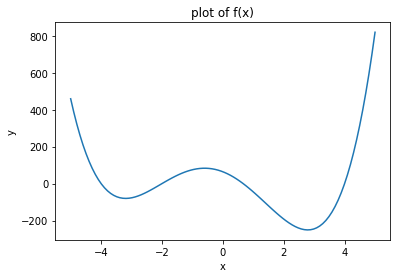

In [3]:
x = np.linspace(-5, 5, 100)
y = (x - 4) * (3*x - 2) * (x + 2) * (x + 4)

plt.plot(x, y);
plt.xlabel("x");
plt.ylabel("y");
plt.title("plot of f(x)");

## 3. 算出 $f'(x) = 12x^3 + 12x^2 - 104x - 64$ 並定義gradient descent 函式

In [4]:
def gradient_descent(x, n):
    x -= n * (12 * math.pow(x, 3) + 12 * math.pow(x, 2) - 104 * x - 64)
    return x

## 4. 定義find_min根據x初始值開始帶入gradient_descent 尋找minimum(learning rate =                    0.005)

In [5]:
def find_min(start_x, try_times):
    # history 紀錄過去嘗試過的x
    history = []
    # learning rate = 0.005
    n = 0.005
    
    for i in range(0, try_times):
        history += [start_x]
        start_x = gradient_descent(start_x, n)
        
    return history

## 5. 隨機生成x初始值，帶入draw_process看出gradient_descent的過程與結果
### (jupyter notebook viewer 無法使用interact)

In [14]:
start_x = np.random.uniform(-5, 5)

def draw_process(start_x, try_times = 5):
    print("starting from x = ", start_x)
    # 先畫出函數圖形
    plt.plot(x, y, c = 'b');
    plt.xlabel("x");
    plt.ylabel("y");
    plt.title("plot of f(x)");
    
    # 印出gradient descent中各個點的座標
    X = np.array(find_min(start_x, try_times))
    Y = (X - 4) * (3*X - 2) * (X + 2) * (X + 4)
    print("\n(x, y) positions are: \n")
    print(np.c_[X, Y])
    
    # 畫出gradient descent中的各個點(由淺到深)
    alphas = np.linspace(0.1, 1, len(X))
    rgba_colors = np.zeros((len(X),4))
    rgba_colors[:, 0] = 1.0
    rgba_colors[:, 3] = alphas
    plt.scatter(X, Y, color = rgba_colors);
    
    # 以十字標示出local min的點
    plt.axvline(x=X[len(X) - 1], c = 'r')
    plt.axhline(y=Y[len(X) - 1], c = 'r')

# 使用interact 決定gradient descent計算次數
interact(draw_process, start_x = fixed(start_x), try_times = (1, 20))

interactive(children=(IntSlider(value=5, description='try_times', max=20, min=1), Output()), _dom_classes=('wi…

<function __main__.draw_process(start_x, try_times=5)>

## 6. 自行嘗試各種初始x並找出minimum

starting from x =  -1

(x, y) positions are: 

[[ -1.          75.        ]
 [ -1.2         65.2288    ]
 [ -1.48672     45.72474473]
 [ -1.87526551  11.87418882]
 [ -2.34572496 -32.79837921]
 [ -2.80121685 -67.9615199 ]
 [ -3.0898206  -79.25386235]
 [ -3.17943736 -80.17137131]
 [ -3.19085214 -80.18541789]
 [ -3.19172068 -80.1854986 ]]


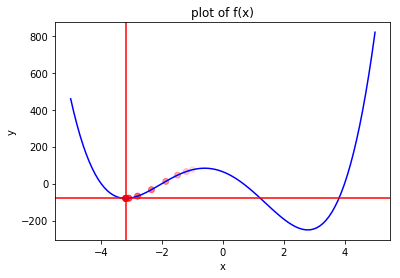

In [16]:
draw_process(-1, try_times = 10)

### 以上圖形在初始x = -1時找到了local minimum

starting from x =  -0.5

(x, y) positions are: 

[[-5.00000000e-01  8.26875000e+01]
 [-4.47500000e-01  8.19885240e+01]
 [-3.66838495e-01  8.03368638e+01]
 [-2.42706803e-01  7.64233144e+01]
 [-5.15909140e-02  6.71628861e+01]
 [ 2.41430352e-01  4.55839327e+01]
 [ 6.82632460e-01 -1.99598191e+00]
 [ 1.31055624e+00 -9.13347611e+01]
 [ 2.07393467e+00 -2.01211713e+02]
 [ 2.67908331e+00 -2.49225354e+02]
 [ 2.80781219e+00 -2.50649693e+02]
 [ 2.78667062e+00 -2.50684196e+02]
 [ 2.79140837e+00 -2.50685960e+02]
 [ 2.79039042e+00 -2.50686041e+02]
 [ 2.79061127e+00 -2.50686045e+02]]


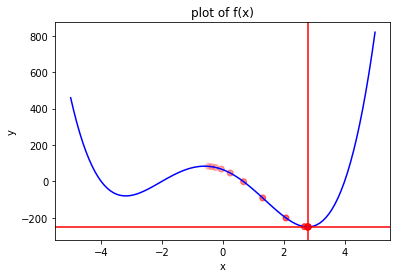

In [17]:
draw_process(-0.5, try_times = 15)

### 以上圖形在初始x = -0.5 時找到global minimum

starting from x =  4

(x, y) positions are: 

[[   4.            0.        ]
 [   1.6        -135.4752    ]
 [   2.35264    -230.39203784]
 [   2.78261816 -250.67836775]
 [   2.79225907 -250.68569891]
 [   2.79020497 -250.68602898]]


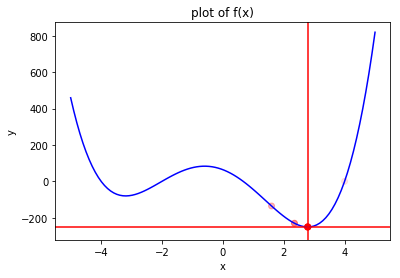

In [21]:
draw_process(4, try_times = 6)

### 以上圖形在初始x = -0.5 時找到global minimum(先跳到minimum左邊後再向右逼近)